In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.shape

(891, 12)

**Checking for the missing values**

In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


leave the column cabin because it contains lots of null values

In [8]:
df.drop(columns="Cabin",axis=1,inplace=True)

In [17]:
df.isnull().sum().sum()

0

In [18]:
#Checking for duplicate values
df.duplicated().sum()

0

In [16]:

# Handle missing values:
# - For numerical columns, replace with median
# - For categorical columns, replace with mode
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)

In [20]:
# Verify missing values are handled
print(df.isnull().sum())

# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
Number of duplicate rows: 0


# Exploratory Data Analysis (EDA)

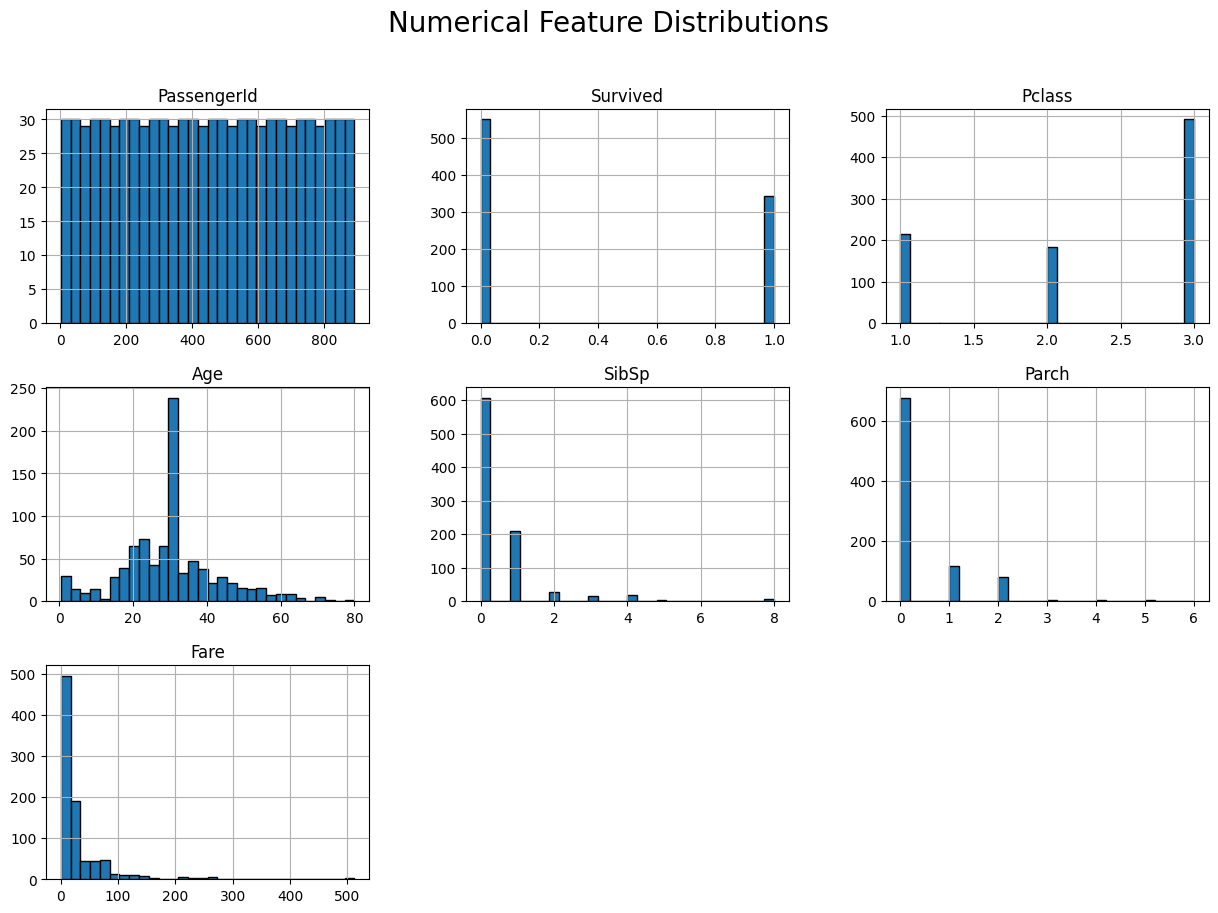

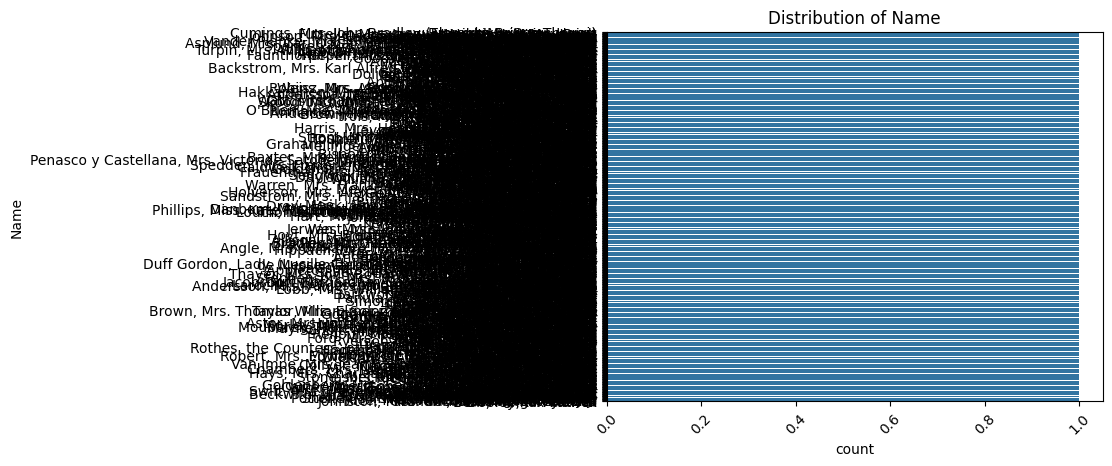

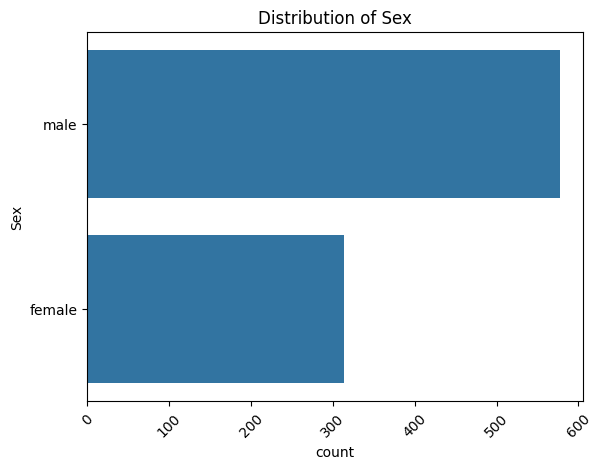

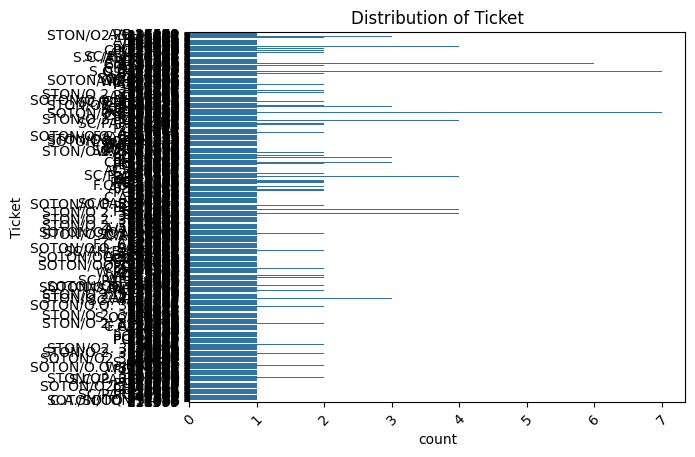

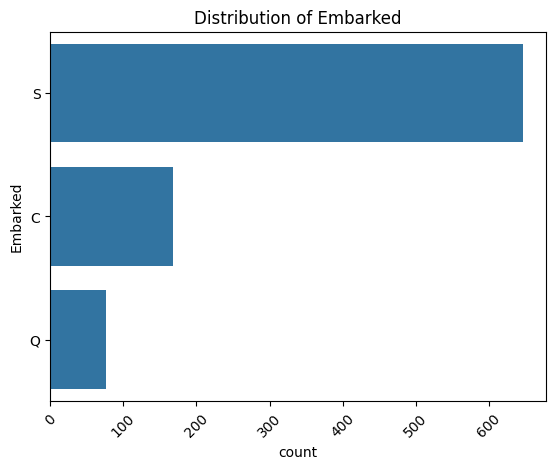

In [21]:
# Distribution of numerical features
df.describe()

# Visualize distributions
df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Numerical Feature Distributions', fontsize=20)
plt.show()

# Categorical feature counts
for col in df.select_dtypes(include=['object']).columns:
    sns.countplot(df[col])
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


# Bivariate Analysis

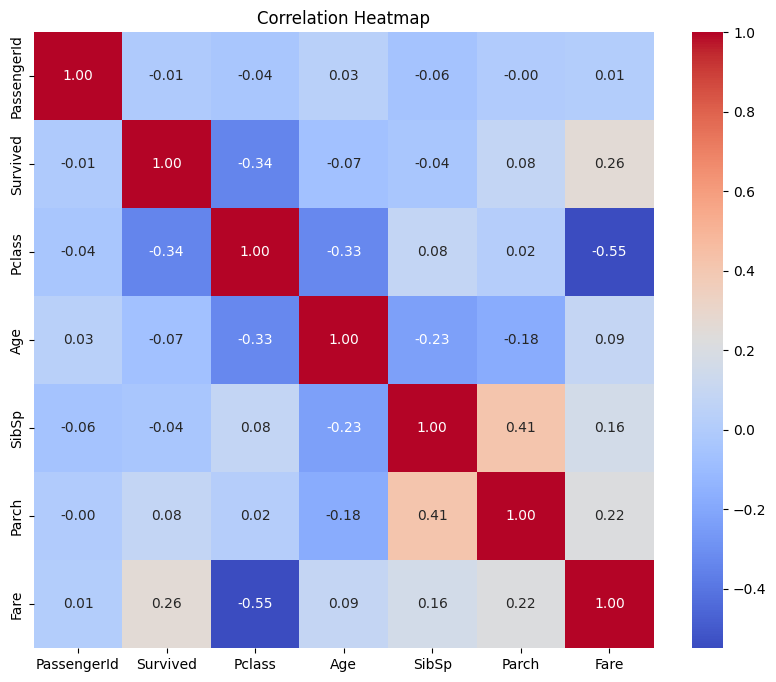

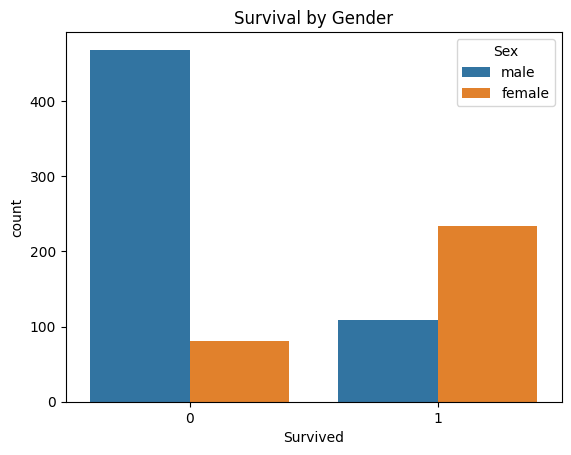

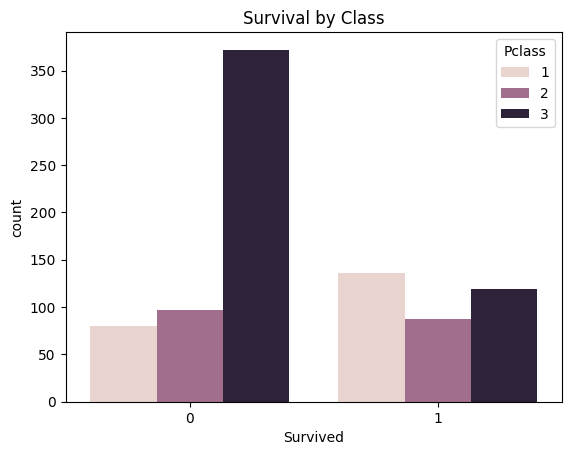

In [23]:
# Correlation heatmap for numerical variables
plt.figure(figsize=(10, 8))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Relationship between survival and other features
if 'Survived' in df.columns:
    # Survival by gender
    sns.countplot(x='Survived', hue='Sex', data=df)
    plt.title('Survival by Gender')
    plt.show()

    # Survival by class
    sns.countplot(x='Survived', hue='Pclass', data=df)
    plt.title('Survival by Class')
    plt.show()


# Multivariate Analysis

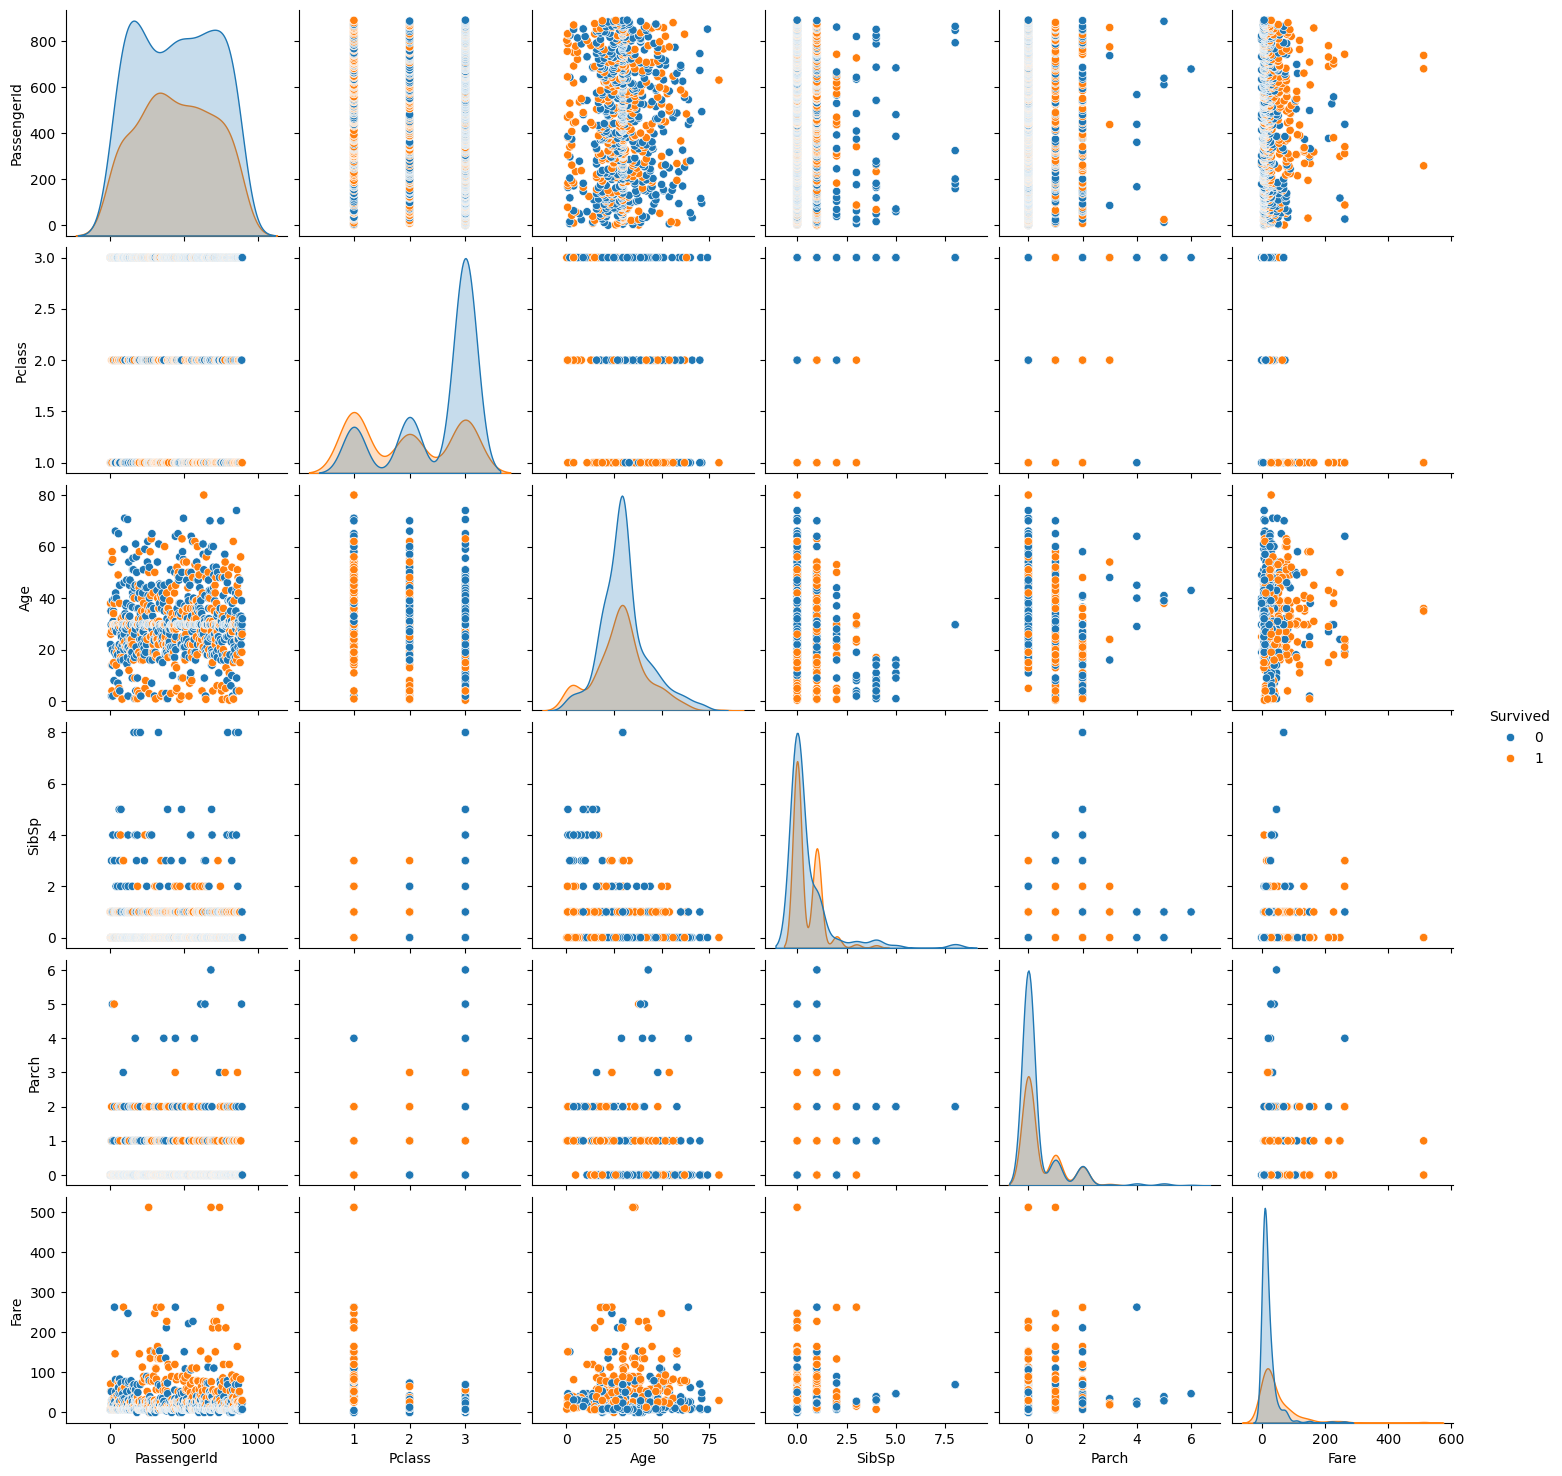

In [24]:
# Pairplot for numerical features and survival
sns.pairplot(df, hue='Survived', diag_kind='kde')
plt.show()

# Identify Patterns and Trends

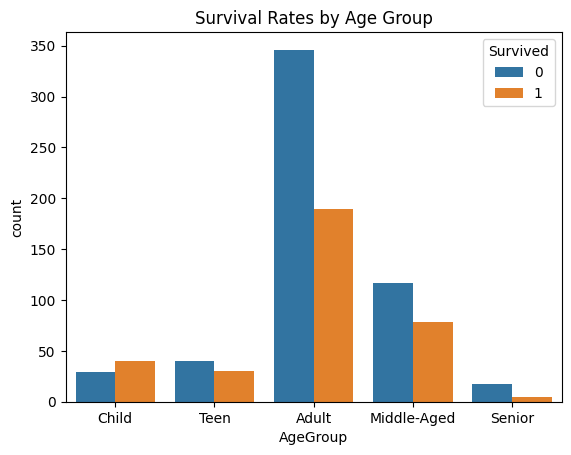

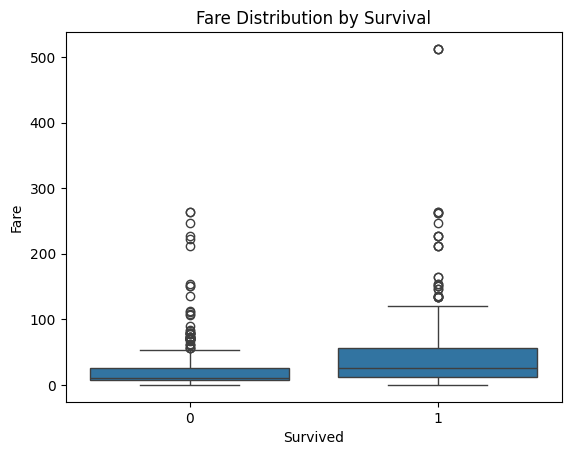

In [25]:
# Analyze survival rates by age group
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior'])
sns.countplot(x='AgeGroup', hue='Survived', data=df)
plt.title('Survival Rates by Age Group')
plt.show()

# Analyze fare distribution and survival
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')
plt.show()


# Save Cleaned Data

In [28]:
import os
import pandas as pd

# ... your existing code ...

# Save the cleaned dataset
cleaned_file_path = '/mnt/data/Cleaned_Titanic_Dataset.csv'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(cleaned_file_path), exist_ok=True)

df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")


Cleaned dataset saved to /mnt/data/Cleaned_Titanic_Dataset.csv
